In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
from sklearn import linear_model
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer

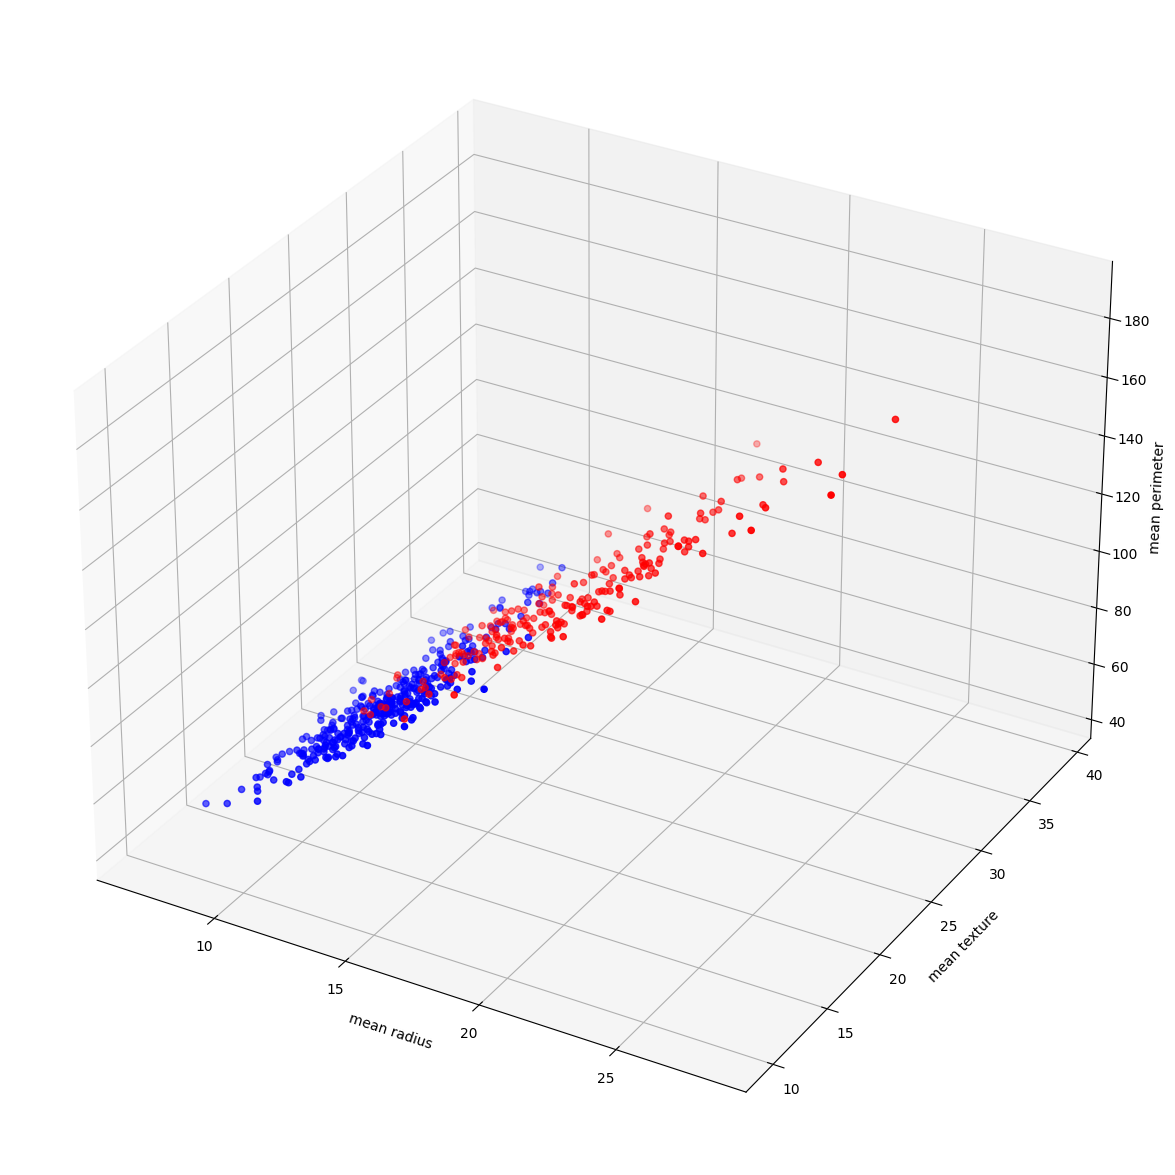

In [23]:
cancer = load_breast_cancer()

#---copy from dataset into a 2-d array---
X = []
for target in range(2):
    X.append([[], [], []])
    for i in range(len(cancer.data)):    # target is 0,1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0])
            X[target][1].append(cancer.data[i][1])
            X[target][2].append(cancer.data[i][2])

colours = ("r", "b")   # r: malignant, b: benign
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               X[target][2],
               c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

In [24]:
x = cancer.data[:,0]            # mean radius
y = cancer.target               # 0: malignant, 1: benign

In [25]:
log_regress = linear_model.LogisticRegression()

#---train the model---
log_regress.fit(X = np.array(x).reshape(len(x),1),
                y = y)

#---print trained model intercept---
print(log_regress.intercept_)

#---print trained model coefficients---
print(log_regress.coef_)

[15.120902]
[[-1.02475609]]


In [28]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(
                              cancer.data,               # features
                              cancer.target,             # labels
                              test_size = 0.25,          # split ratio
                              random_state = 1,          # set random seed
                              stratify = cancer.target)  # randomize based on labels

In [29]:
from sklearn import linear_model
x = train_set[:,0:30]         # mean radius
y = train_labels              # 0: malignant, 1: benign
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = x,
                y = y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
import pandas as pd

#---get the predicted probablities and convert into a dataframe---
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))

#---assign column names to prediction---
preds_prob.columns = ["Malignant", "Benign"]

#---get the predicted class labels---
preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

#---actual diagnosis---
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]

#---merge the three dataframes into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())

   Malignant        Benign  Prediction  Original Result
0   0.999837  1.630691e-04           0                0
1   0.999748  2.518486e-04           0                0
2   0.173488  8.265124e-01           1                1
3   1.000000  5.658321e-09           0                0
4   0.089217  9.107834e-01           1                0


In [31]:
#---generate table of predictions vs actual---
print("---Confusion Matrix---")
print(pd.crosstab(preds, test_labels))

---Confusion Matrix---
col_0   0   1
row_0        
0      48   4
1       5  86


In [32]:
from sklearn import metrics
print(metrics.confusion_matrix(y_true=test_labels, y_pred=preds))

[[48  5]
 [ 4 86]]


In [33]:
print("---Accuracy-------------")
print(log_regress.score(X= test_set, y= test_labels))

---Accuracy-------------
0.9370629370629371


In [34]:
print(metrics.classification_report(
      y_true = test_labels,
      y_pred = preds))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

